In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Bias_correction_ucl.csv')

In [3]:
data

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  6/30/2013          28.7          21.4    58.255688   
1         2.0  6/30/2013          31.9          21.6    52.263397   
2         3.0  6/30/2013          31.6          23.3    48.690479   
3         4.0  6/30/2013          32.0          23.4    58.239788   
4         5.0  6/30/2013          31.4          21.9    56.174095   
...       ...        ...           ...           ...          ...   
7747     23.0  8/30/2017          23.3          17.1    26.741310   
7748     24.0  8/30/2017          23.3          17.7    24.040634   
7749     25.0  8/30/2017          23.2          17.4    22.933014   
7750      NaN        NaN          20.0          11.3    19.794666   
7751      NaN        NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [4]:
data.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  6/30/2013          28.7          21.4    58.255688    91.116364   
1      2.0  6/30/2013          31.9          21.6    52.263397    90.604721   
2      3.0  6/30/2013          31.6          23.3    48.690479    83.973587   
3      4.0  6/30/2013          32.0          23.4    58.239788    96.483688   
4      5.0  6/30/2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [5]:
data.tail()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  8/30/2017          23.3          17.1    26.741310   
7748     24.0  8/30/2017          23.3          17.7    24.040634   
7749     25.0  8/30/2017          23.2          17.4    22.933014   
7750      NaN        NaN          20.0          11.3    19.794666   
7751      NaN        NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [6]:
data.shape

(7752, 25)

In [7]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [8]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [9]:
data.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [10]:
#There are so many null values are present in the dataset we will deal with them 

In [11]:
data=data.replace(np.NaN,0)
# Replacing the NaN value with the 0

In [12]:
data.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [13]:
#Now their is no null value in the dataset 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7752 non-null   object 
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


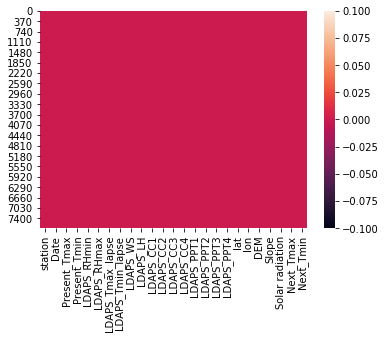

In [15]:
sns.heatmap(data.isnull())

In [16]:
data.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     12.996646     29.499407     23.015338    56.210230    87.519784   
std       7.213660      4.083116      3.256071    15.618676    11.227876   
min       0.000000      0.000000      0.000000     0.000000     0.000000   
25%       7.000000     27.700000     21.600000    45.735368    84.038809   
50%      13.000000     29.900000     23.400000    54.828714    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.326939         23.285106     7.029203    61.900288   
std            4.123757          3.277967     2.281613    34.120103   
min            0.000000          0.000000     0.000000   -13.603212   
25%           27.601014         22.032374     5.647741    36.776474   
50%           29.662273         23.735942     6.531345    56.487289   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.365206  ...     0.480310     0.275508     0.266801    37.544722   
std       0.263668  ...     1.754900     1.156495     1.200654     0.050352   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.141643  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.312156  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571696  ...     0.016748     0.007231     0.000000    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7752.000000  7752.000000  7752.000000      7752.000000  7752.000000   
mean    126.991397    61.867972     1.257048      5341.502803    30.169440   
std       0.079435    54.279780     1.370444       429.158867     3.596114   
min     126.826000    12.370000     0.098475      4329.520508     0.000000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178230      5992.895996    38.900000   

         Next_Tmin  
count  7752.000000  
mean     22.852348  
std       2.827042  
min       0.000000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

In [17]:
#1) The mean is almost equal than the median 50th percentile in columns. 
#3)Their is large difference in 75% and max in station,Present_Tmax,LDAPS_RHmax,LDAPS_LH,

In [18]:
datacor=data.corr()
datacor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.093484      0.109070    -0.062429   
Present_Tmax      0.093484      1.000000      0.796060    -0.167379   
Present_Tmin      0.109070      0.796060      1.000000     0.042678   
LDAPS_RHmin      -0.062429     -0.167379      0.042678     1.000000   
LDAPS_RHmax      -0.106065     -0.190934     -0.087845     0.619118   
LDAPS_Tmax_lapse  0.049270      0.258220      0.181450    -0.125199   
LDAPS_Tmin_lapse  0.074748      0.277778      0.330684     0.309329   
LDAPS_WS          0.003936     -0.104266     -0.056121     0.370372   
LDAPS_LH         -0.131658      0.091490     -0.018650    -0.001355   
LDAPS_CC1         0.006642     -0.232985      0.047237     0.616968   
LDAPS_CC2         0.003128     -0.171536      0.042993     0.738195   
LDAPS_CC3         0.000361     -0.126714     -0.029631     0.683737   
LDAPS_CC4         0.005734     -0.129399     -0.064573     0.518152   
LDAPS_PPT1       -0.005411     -0.077180      0.083750     0.256015   
LDAPS_PPT2       -0.010980     -0.075777      0.045526     0.374882   
LDAPS_PPT3       -0.015526     -0.086998     -0.034823     0.233215   
LDAPS_PPT4       -0.013516     -0.082853     -0.057832     0.165342   
lat              -0.237456     -0.030749     -0.050726     0.081402   
lon              -0.118591      0.011455     -0.027258    -0.071251   
DEM              -0.256155     -0.132419     -0.181700     0.095443   
Slope            -0.090492     -0.064182     -0.095836     0.115658   
Solar radiation  -0.018798     -0.024520      0.033574     0.245973   
Next_Tmax         0.103471      0.471320      0.384234    -0.403276   
Next_Tmin         0.122164      0.473728      0.588769     0.039808   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.106065          0.049270          0.074748  0.003936   
Present_Tmax        -0.190934          0.258220          0.277778 -0.104266   
Present_Tmin        -0.087845          0.181450          0.330684 -0.056121   
LDAPS_RHmin          0.619118         -0.125199          0.309329  0.370372   
LDAPS_RHmax          1.000000          0.372350          0.489207  0.316808   
LDAPS_Tmax_lapse     0.372350          1.000000          0.824795  0.002716   
LDAPS_Tmin_lapse     0.489207          0.824795          1.000000  0.125638   
LDAPS_WS             0.316808          0.002716          0.125638  1.000000   
LDAPS_LH             0.287786          0.159654          0.031520  0.060898   
LDAPS_CC1            0.381210         -0.212644          0.103823  0.314795   
LDAPS_CC2            0.350814         -0.274477          0.128112  0.287388   
LDAPS_CC3            0.239198         -0.294763          0.056062  0.267462   
LDAPS_CC4            0.171274         -0.222670          0.023888  0.243670   
LDAPS_PPT1           0.194093         -0.057927          0.048090  0.154384   
LDAPS_PPT2           0.166798         -0.153120          0.019615  0.190944   
LDAPS_PPT3           0.103924         -0.117201         -0.046515  0.161133   
LDAPS_PPT4           0.092030         -0.098521         -0.051957  0.143897   
lat                  0.124812         -0.029935         -0.068535  0.034917   
lon                  0.016358          0.064481         -0.019014 -0.056643   
DEM                  0.112953         -0.127217         -0.139151  0.181986   
Slope                0.140001         -0.115436         -0.132310  0.163485   
Solar radiation      0.133827          0.069409          0.149156  0.131265   
Next_Tmax           -0.244316          0.440702          0.285218 -0.320432   
Next_Tmin           -0.107132          0.314810          0.491376 -0.109601   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.131658   0.006642  ...   -0.010980   -0.015526   
Present_Tmax      0.091490  -0.232985  ...   -0.075777   -0.086998   
Present_Tmin     -0.018650   0.047237  ...    0.045526   

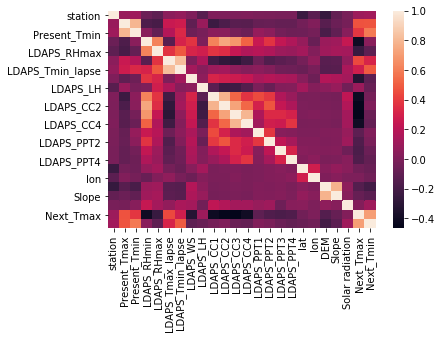

In [19]:
sns.heatmap(datacor)

In [20]:
#The columns  LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4,LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 are positive 
#correalted.
# The Next_tmax and Next_Tmin are correlated to each other.
# The Slope and DEM are positive correlated.

In [21]:
data.skew()

station            -0.000115
Present_Tmax       -3.402987
Present_Tmin       -3.232442
LDAPS_RHmin        -0.113889
LDAPS_RHmax        -4.712138
LDAPS_Tmax_lapse   -3.457452
LDAPS_Tmin_lapse   -3.573353
LDAPS_WS            1.163684
LDAPS_LH            0.635208
LDAPS_CC1           0.460727
LDAPS_CC2           0.474379
LDAPS_CC3           0.643064
LDAPS_CC4           0.671739
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -2.213759
Next_Tmin          -2.049088
dtype: float64

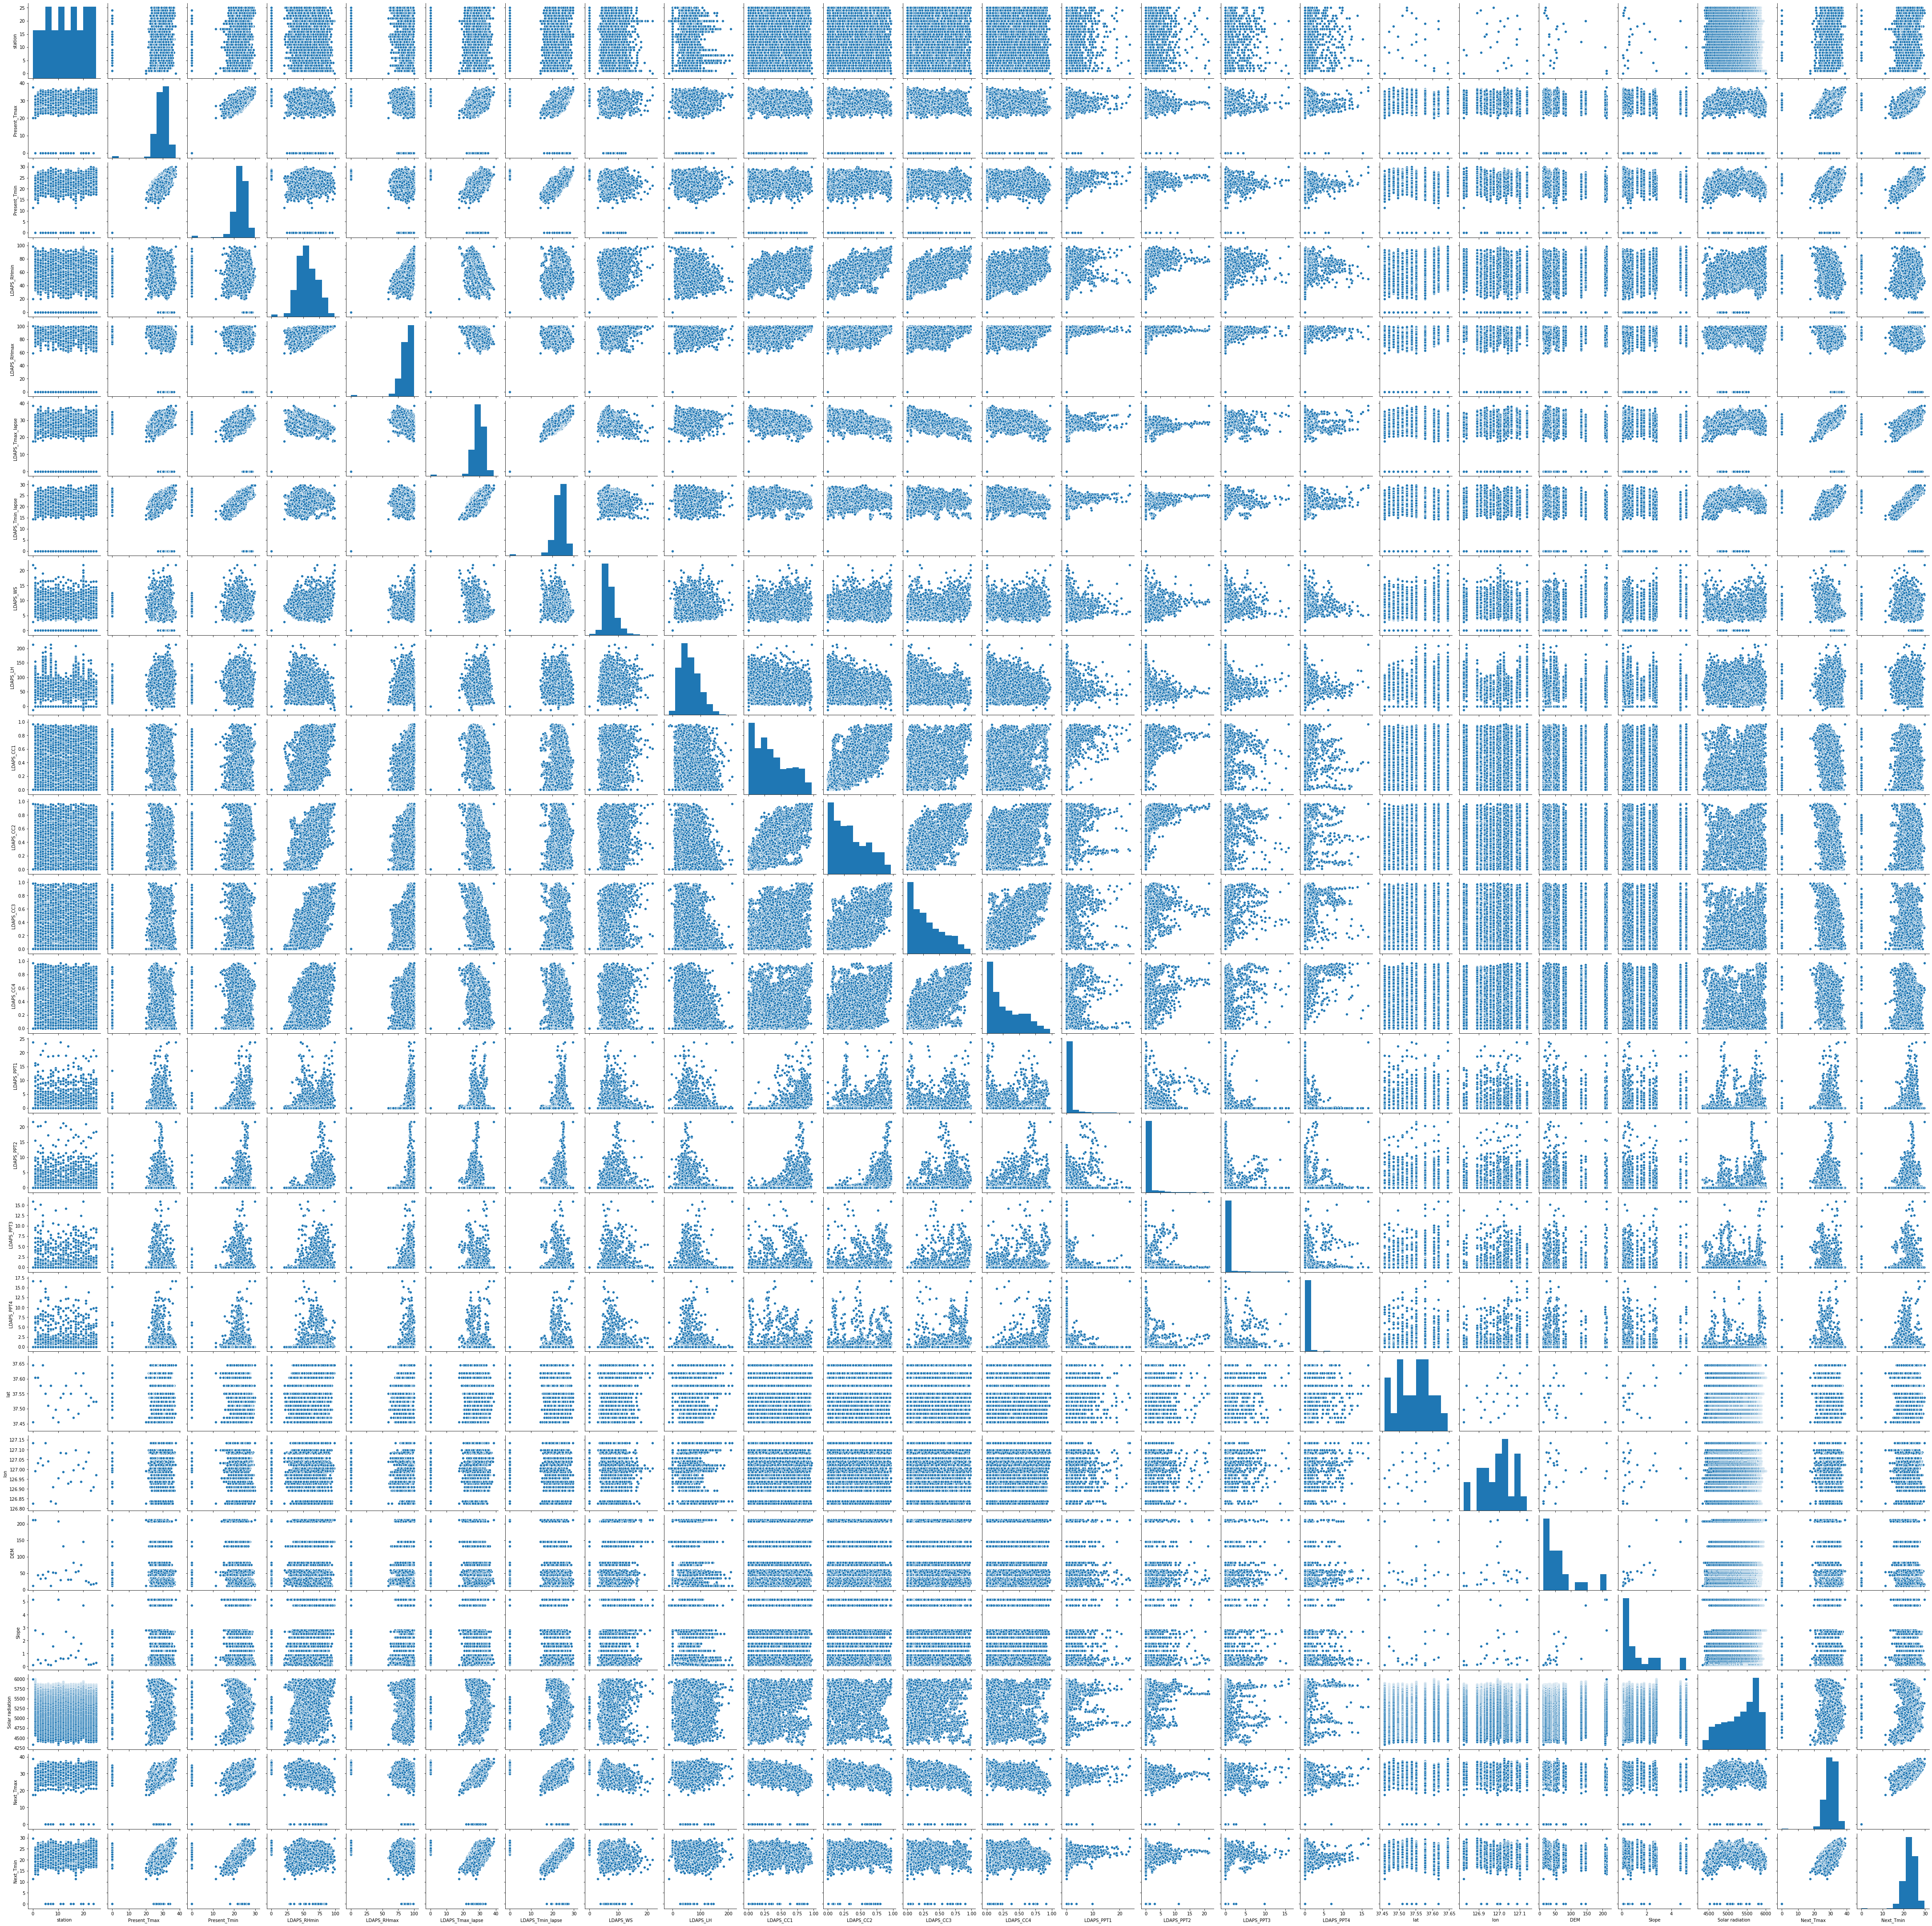

In [22]:
#Lets check pairplot using seaborn library
import seaborn as sns
sns.pairplot(data)
plt.show()

In [23]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [24]:
# dropping passed columns 
#data.drop(["Team", "Weight"], axis = 1, inplace = True) 
data.drop(['Date'], axis = 1, inplace = True)

In [25]:
data

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   
7750      0.0          20.0          11.3    19.794666    58.936283   
7751      0.0          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936   6.818887   69.451805   0.233947   
1            29.850689         24.035009   5.691890   51.937448   0.225508   
2            30.091292         24.565633   6.138224   20.573050   0.209344   
3            29.704629         23.326177   5.650050   65.727144   0.216372   
4            29.113934         23.486480   5.735004  107.965535   0.151407   
...                ...               ...        ...         ...        ...   
7747         26.352081         18.775678   6.148918   72.058294   0.030034   
7748         27.010193         18.733519   6.542819   47.241457   0.035874   
7749         27.939516         18.522965   7.289264    9.090034   0.048954   
7750         17.624954         14.272646   2.882580  -13.603212   0.000000   
7751         38.542255         29.619342  21.857621  213.414006   0.967277   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 24 columns]

In [26]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(7752, 24)
(6866, 24)


In [27]:
#so from the data the 886 outliers are removed 

In [28]:
# Separating target and input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(data_final)
x=pd.DataFrame(x,columns=data_final.columns)

In [29]:
x
x.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.672348     -0.404282     -0.761114     0.205972     0.446552   
1 -1.533629      0.693943     -0.677128    -0.224320     0.375773   
2 -1.394910      0.590985      0.036745    -0.480883    -0.541560   
3 -1.256191      0.728263      0.078738     0.204830     1.189053   
4 -1.117471      0.522346     -0.551151     0.056498     0.313577   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.630480         -0.249173 -0.032383  0.225036  -0.439735  ...   
1          0.003979          0.195016 -0.631559 -0.297583  -0.473289  ...   
2          0.089904          0.424277 -0.394262 -1.233479  -0.537559  ...   
3         -0.048182         -0.111242 -0.653803  0.113895  -0.509614  ...   
4         -0.259132         -0.041982 -0.608636  1.374266  -0.767912  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon       DEM     Slope  \
0   -0.276878   -0.258024   -0.238858  1.207246  0.004334  2.800131  1.132480   
1   -0.276878   -0.258024   -0.238858  1.207246  0.521521 -0.309367 -0.539260   
2   -0.276878   -0.258024   -0.238858  0.668533  0.849493 -0.521938 -0.721827   
3   -0.276878   -0.258024   -0.238858  2.013320  0.395378 -0.291672  0.948293   
4   -0.276878   -0.258024   -0.238858  0.131815  1.820795 -0.489814 -0.545591   

   Solar radiation  Next_Tmax  Next_Tmin  
0         1.533643  -0.459190  -0.733150  
1         1.243526   0.012065  -0.200403  
2         1.230011   0.214032   0.373326  
3         1.214539   0.415999   0.537248  
4         1.220613   0.247693  -0.200403  

[5 rows x 24 columns]

In [30]:
#There are two outputs (i.e. next-day maximum and minimum air temperatures)

In [31]:
y=data_final.iloc[:,-1]
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([64, 77, 91, ..., 33, 40, 26], dtype=int64)

In [33]:
x.shape

(6866, 24)

In [34]:
y.shape

(6866,)

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corressponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [36]:
#Lets use Linear regression and check max r2 score corressponding to different random state
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42  is  0.9999709090270665
r2 score corresponding to  43  is  0.999979144948178
r2 score corresponding to  44  is  0.999963006899623
r2 score corresponding to  45  is  0.9999813692367767
r2 score corresponding to  46  is  0.9999225299089528
r2 score corresponding to  47  is  0.999963380138928
r2 score corresponding to  48  is  0.999973865379005
r2 score corresponding to  49  is  0.9999300937174657
r2 score corresponding to  50  is  0.9999691755112529
r2 score corresponding to  51  is  0.9999840047359114
r2 score corresponding to  52  is  0.9999909705386574
r2 score corresponding to  53  is  0.9999879254396252
r2 score corresponding to  54  is  0.9999914859909078
r2 score corresponding to  55  is  0.9999925281148059
r2 score corresponding to  56  is  0.9999740169558718
r2 score corresponding to  57  is  0.999952378771004
r2 score corresponding to  58  is  0.9999825918865453
r2 score corresponding to  59  is  0.9999887282906613
r2 score corresponding to  60  is

In [37]:
#Lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors, cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 11}

In [38]:
#Lets use KNN regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=11)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.9135147343216249
r2 score corresponding to  43  is  0.9095492877074348
r2 score corresponding to  44  is  0.9113542167944336
r2 score corresponding to  45  is  0.9134616316237412
r2 score corresponding to  46  is  0.9175779989248954
r2 score corresponding to  47  is  0.9164733650760613
r2 score corresponding to  48  is  0.9128340015455734
r2 score corresponding to  49  is  0.9163931661701122
r2 score corresponding to  50  is  0.9216750982636661
r2 score corresponding to  51  is  0.9160472296077317
r2 score corresponding to  52  is  0.9098046202279854
r2 score corresponding to  53  is  0.9107902951802004
r2 score corresponding to  54  is  0.9163955451010456
r2 score corresponding to  55  is  0.9150213198138535
r2 score corresponding to  56  is  0.9196968613600583
r2 score corresponding to  57  is  0.909282718148587
r2 score corresponding to  58  is  0.9168949104604042
r2 score corresponding to  59  is  0.9087009560693471
r2 score corresponding to  60

In [39]:
#Lets check the mean r2 score of both LinearRegression model and knn regression
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression :",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression : 0.9999597799448022
standard deviation in r2 score for Linear Regression: 3.5244142875576255e-05

Mean r2 score for KNN Regression: 0.8000066301405419
standard deviation in r2 score for KNN Regression:  0.05366096178719002


In [40]:
#Lets check laso Regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [41]:
#Lets check max_r2 score whenwe use lasso
lsreg=Lasso(alpha=0.01)
r_stat=maxr2_score(lsreg,x,y)

r2 score corresponding to  42  is  0.9999706235704605
r2 score corresponding to  43  is  0.9999791642144981
r2 score corresponding to  44  is  0.9999626446868344
r2 score corresponding to  45  is  0.9999812768307439
r2 score corresponding to  46  is  0.9999228767453546
r2 score corresponding to  47  is  0.9999632594291845
r2 score corresponding to  48  is  0.999973333548021
r2 score corresponding to  49  is  0.9999302299338757
r2 score corresponding to  50  is  0.9999688250007069
r2 score corresponding to  51  is  0.9999843966865565
r2 score corresponding to  52  is  0.9999905760911586
r2 score corresponding to  53  is  0.9999876800101644
r2 score corresponding to  54  is  0.9999910570035734
r2 score corresponding to  55  is  0.9999922804527733
r2 score corresponding to  56  is  0.999973461422547
r2 score corresponding to  57  is  0.9999523569743888
r2 score corresponding to  58  is  0.9999823925642479
r2 score corresponding to  59  is  0.999988821665911
r2 score corresponding to  60  

In [42]:
#Lets use cross val score with lasso
print("Mean r2_score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
#Based on below output i can say lasso performed just like linear regression

Mean r2_score for Lasso Regression:  0.9999602683456473
standard deviation in r2 score for Lasso Regression:  3.515100502459906e-05


In [43]:
#Now we will try to use gradient boosting technique
#for getting best set of parameters we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000,]}
clr = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [44]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print("Mean r2 score for gradiant boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradiant boosting Regression:  0.9998637797344682
standard deviation in r2 score for gradient boosting Regression:  7.969153005831669e-05


In [45]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to  42  is  0.9999178523480327
r2 score corresponding to  43  is  0.9999205273001738
r2 score corresponding to  44  is  0.9999012486873929
r2 score corresponding to  45  is  0.9999140609781711
r2 score corresponding to  46  is  0.9998659915868302
r2 score corresponding to  47  is  0.9999035682059612
r2 score corresponding to  48  is  0.9999191904826732
r2 score corresponding to  49  is  0.9998575977335155
r2 score corresponding to  50  is  0.9998626159619721
r2 score corresponding to  51  is  0.9999021098734008
r2 score corresponding to  52  is  0.9999371805603096
r2 score corresponding to  53  is  0.9999227747381974
r2 score corresponding to  54  is  0.9999281940686006
r2 score corresponding to  55  is  0.9999338863901752
r2 score corresponding to  56  is  0.9999185564615141
r2 score corresponding to  57  is  0.9998912953726571
r2 score corresponding to  58  is  0.9999303183158402
r2 score corresponding to  59  is  0.9999212116796937
r2 score corresponding to  6

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 80,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [47]:
#Lets find the rmse and r2_score using sklearn,metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.06024634803564724
r2_score is:  0.9999936508929984


In [48]:
from sklearn.externals import joblib

#save the model as a pickel in a file
joblib.dump(lreg, "Next_day_Min_Temp_lreg.pkl")

['Next_day_Min_Temp_lreg.pkl']

Conclusion : In this dataset firstly i look the data since i have to predict the temperature of air next day minimum so i take it as a Y variable and rest column was taken as a X before spliting the dataset i check the datatype and change the datatype of the columns and see the correlation , null values , description, skewness and pairplot i check the outlier 886 outliers got removed.Than i split the data into x and y and apply the standard scaler in x and in y the label encoder.

You will see that in LinearRegression r2 score of 80 is 0.99 In KNeighborsRegression r2 score of 50 is 0.92 In GradientBoostingRegressor r2 score of 51 is 0.62 In Lasso r2 score corressponding to 80 is 0.99 Since from the 4 algorithm i see that I am getting best score in LinearRegression So i am saving the model.

In [49]:
# Separating target and input variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(data_final)
x=pd.DataFrame(x,columns=data_final.columns)

In [50]:
x
x.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0 -1.672348     -0.404282     -0.761114     0.205972     0.446552   
1 -1.533629      0.693943     -0.677128    -0.224320     0.375773   
2 -1.394910      0.590985      0.036745    -0.480883    -0.541560   
3 -1.256191      0.728263      0.078738     0.204830     1.189053   
4 -1.117471      0.522346     -0.551151     0.056498     0.313577   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         -0.630480         -0.249173 -0.032383  0.225036  -0.439735  ...   
1          0.003979          0.195016 -0.631559 -0.297583  -0.473289  ...   
2          0.089904          0.424277 -0.394262 -1.233479  -0.537559  ...   
3         -0.048182         -0.111242 -0.653803  0.113895  -0.509614  ...   
4         -0.259132         -0.041982 -0.608636  1.374266  -0.767912  ...   

   LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon       DEM     Slope  \
0   -0.276878   -0.258024   -0.238858  1.207246  0.004334  2.800131  1.132480   
1   -0.276878   -0.258024   -0.238858  1.207246  0.521521 -0.309367 -0.539260   
2   -0.276878   -0.258024   -0.238858  0.668533  0.849493 -0.521938 -0.721827   
3   -0.276878   -0.258024   -0.238858  2.013320  0.395378 -0.291672  0.948293   
4   -0.276878   -0.258024   -0.238858  0.131815  1.820795 -0.489814 -0.545591   

   Solar radiation  Next_Tmax  Next_Tmin  
0         1.533643  -0.459190  -0.733150  
1         1.243526   0.012065  -0.200403  
2         1.230011   0.214032   0.373326  
3         1.214539   0.415999   0.537248  
4         1.220613   0.247693  -0.200403  

[5 rows x 24 columns]

In [51]:
y=data_final.iloc[:,-2]
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([78, 92, 98, ..., 70, 73, 65], dtype=int64)

In [53]:
x.shape

(6866, 24)

In [54]:
y.shape

(6866,)

In [55]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corressponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [56]:
#Lets use Linear regression and check max r2 score corressponding to different random state
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  42  is  0.9999511046501957
r2 score corresponding to  43  is  0.999898967257135
r2 score corresponding to  44  is  0.9999939814708949
r2 score corresponding to  45  is  0.9998133696694131
r2 score corresponding to  46  is  0.9999051611727392
r2 score corresponding to  47  is  0.9998569924045445
r2 score corresponding to  48  is  0.9999506061557182
r2 score corresponding to  49  is  0.9999753932248948
r2 score corresponding to  50  is  0.9999139758651698
r2 score corresponding to  51  is  0.9999306810875012
r2 score corresponding to  52  is  0.9999942930003376
r2 score corresponding to  53  is  0.9999085615236636
r2 score corresponding to  54  is  0.9999256219537721
r2 score corresponding to  55  is  0.9999101368030809
r2 score corresponding to  56  is  0.9999288535993179
r2 score corresponding to  57  is  0.9999966762100535
r2 score corresponding to  58  is  0.9999139161848651
r2 score corresponding to  59  is  0.99999185922968
r2 score corresponding to  60  

In [57]:
#Lets use grid_search to find optimal value of n_neigbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors, cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 14}

In [58]:
#Lets use KNN regression and check max r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=14)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to  42  is  0.9100046880542139
r2 score corresponding to  43  is  0.9121354183099298
r2 score corresponding to  44  is  0.9090935602953534
r2 score corresponding to  45  is  0.906273331296513
r2 score corresponding to  46  is  0.907453746210496
r2 score corresponding to  47  is  0.911790903435799
r2 score corresponding to  48  is  0.9087439310456793
r2 score corresponding to  49  is  0.9169559629870021
r2 score corresponding to  50  is  0.9142507985854957
r2 score corresponding to  51  is  0.9038480329378408
r2 score corresponding to  52  is  0.915159259585959
r2 score corresponding to  53  is  0.9040697632332328
r2 score corresponding to  54  is  0.9139410857480471
r2 score corresponding to  55  is  0.9143340722117783
r2 score corresponding to  56  is  0.9082862506069193
r2 score corresponding to  57  is  0.9052034132999173
r2 score corresponding to  58  is  0.9164009415350876
r2 score corresponding to  59  is  0.9022360351319815
r2 score corresponding to  60  i

In [59]:
#Lets check the mean r2 score of both LinearRegression model and knn regression
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression :",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression:",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())
#Based on below output Linear Regression is performing well

Mean r2 score for Linear Regression : 0.9999354575192086
standard deviation in r2 score for Linear Regression: 8.369633016521597e-05

Mean r2 score for KNN Regression: 0.76746520418534
standard deviation in r2 score for KNN Regression:  0.053172738495602265


In [60]:
#Lets check laso Regression and find best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [61]:
#Lets check max_r2 score whenwe use lasso
lsreg=Lasso(alpha=0.01)
r_stat=maxr2_score(lsreg,x,y)

r2 score corresponding to  42  is  0.9999509291924079
r2 score corresponding to  43  is  0.9998992727990221
r2 score corresponding to  44  is  0.9999939586441173
r2 score corresponding to  45  is  0.999813780895863
r2 score corresponding to  46  is  0.9999052744561779
r2 score corresponding to  47  is  0.9998572550592402
r2 score corresponding to  48  is  0.9999505761742141
r2 score corresponding to  49  is  0.9999753792333919
r2 score corresponding to  50  is  0.9999140604770237
r2 score corresponding to  51  is  0.9999307389898254
r2 score corresponding to  52  is  0.9999942686348561
r2 score corresponding to  53  is  0.9999086594441007
r2 score corresponding to  54  is  0.999925682214823
r2 score corresponding to  55  is  0.999910260432247
r2 score corresponding to  56  is  0.9999290912930887
r2 score corresponding to  57  is  0.9999965281426558
r2 score corresponding to  58  is  0.9999140179710391
r2 score corresponding to  59  is  0.9999917796055066
r2 score corresponding to  60  

In [62]:
#Lets use cross val score with lasso
print("Mean r2_score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
#Based on below output i can say lasso performed just like linear regression

Mean r2_score for Lasso Regression:  0.9999355557222724
standard deviation in r2 score for Lasso Regression:  8.345197645140953e-05


In [63]:
#Now we will try to use gradient boosting technique
#for getting best set of parameters we will use grid search
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000,]}
clr = GridSearchCV(gbr, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [64]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print("Mean r2 score for gradiant boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for gradient boosting Regression: ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradiant boosting Regression:  0.9998171681809321
standard deviation in r2 score for gradient boosting Regression:  0.00023377229912658565


In [65]:
#Lets check maximum r2_score corresponding to this
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to  42  is  0.99990674841799
r2 score corresponding to  43  is  0.9999069223959174
r2 score corresponding to  44  is  0.9999304278835691
r2 score corresponding to  45  is  0.9998434989773983
r2 score corresponding to  46  is  0.9999090969499029
r2 score corresponding to  47  is  0.9998920357615673
r2 score corresponding to  48  is  0.9999296404841589
r2 score corresponding to  49  is  0.9999253104003935
r2 score corresponding to  50  is  0.9999056043689744
r2 score corresponding to  51  is  0.9999257418515611
r2 score corresponding to  52  is  0.9999278374894918
r2 score corresponding to  53  is  0.9999213510652517
r2 score corresponding to  54  is  0.9999091711954398
r2 score corresponding to  55  is  0.9999000811548177
r2 score corresponding to  56  is  0.9999142322983149
r2 score corresponding to  57  is  0.9999304639737803
r2 score corresponding to  58  is  0.9999080968068506
r2 score corresponding to  59  is  0.9999363703110506
r2 score corresponding to  60 

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 57 ,test_size=0.20)
lreg=LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [69]:
#Lets find the rmse and r2_score using sklearn,metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  0.05267345743654805
r2_score is:  0.9999966762100535


In [70]:
from sklearn.externals import joblib

#save the model as a pickel in a file
joblib.dump(lreg,"Next_day_Max_Temp_lreg.pkl" )

['Next_day_Max_Temp_lreg.pkl']

You will see that in LinearRegression r2 score of 57 is 0.99 In KNeighborsRegression r2 score of 61 is 0.91 In GradientBoostingRegressor r2 score of 51 is 0.62 In Lasso r2 score corressponding to 57 is 0.99  Since from the 4 algorithm i see that I am getting best score in LinearRegression So i am saving the model.